In [15]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import h5netcdf as nc
from IPython.display import HTML
import os
%matplotlib inline

In [16]:
cluster_orig = pd.read_csv("/data/gent/vo/000/gvo00041/Kwint_personal/UrbClim_Emulator/ownscripts/clustering/cluster_results/train_combined.csv")
cluster_orig

,City,ELEV,COAST,PRECIP,T_TARGET,AHF,Cluster,Longitude,Latitude
0,Edinburgh,90.444633,3.864330,2858.157789,281.379593,5.122931,2,-3.21,55.95
1,Marseille,163.983688,3.834401,607.883050,288.334053,12.189573,1,5.43,43.30
2,Cluj,479.080793,5.667333,2553.522256,283.200091,2.092672,0,23.61,46.78
3,Paris,83.525098,5.174321,2513.029360,285.638966,27.740309,0,2.35,48.86
4,Palermo,177.441443,3.671385,2526.625609,290.178458,9.657530,1,13.35,38.13
...,...,...,...,...,...,...,...,...,...
95,Newcastle,71.476991,4.090884,889.402231,282.859715,8.016652,2,-1.60,54.97
96,Utrecht,2.112406,4.659210,2684.762632,283.376642,10.179043,2,5.08,52.09
97,Genoa,229.766713,3.846849,2286.177580,287.230593,4.551410,1,8.89,44.43
98,Turin,283.605350,5.025009,1716.495123,287.866644,11.794580,0,7.68,45.07


In [21]:
cluster_new = pd.read_csv("/data/gent/vo/000/gvo00041/Kwint_personal/UrbClim_Emulator/ownscripts/clustering/cluster_results/train_classified.csv")
cluster_new

,City,ELEV,COAST,PRECIP,T_TARGET,AHF,Cluster,Longitude,Latitude
0,Edinburgh,90.444633,3.864330,2858.157789,281.379593,5.122931,2,-3.21,55.95
1,Marseille,163.983688,3.834401,607.883050,288.334053,12.189573,1,5.43,43.30
2,Cluj,479.080793,5.667333,2553.522256,283.200091,2.092672,0,23.61,46.78
3,Paris,83.525098,5.174321,2513.029360,285.638966,27.740309,0,2.35,48.86
4,Palermo,177.441443,3.671385,2526.625609,290.178458,9.657530,1,13.35,38.13
...,...,...,...,...,...,...,...,...,...
95,Newcastle,71.476991,4.090884,889.402231,282.859715,8.016652,2,-1.60,54.97
96,Utrecht,2.112406,4.659210,2684.762632,283.376642,10.179043,2,5.08,52.09
97,Genoa,229.766713,3.846849,2286.177580,287.230593,4.551410,1,8.89,44.43
98,Turin,283.605350,5.025009,1716.495123,287.866644,11.794580,0,7.68,45.07


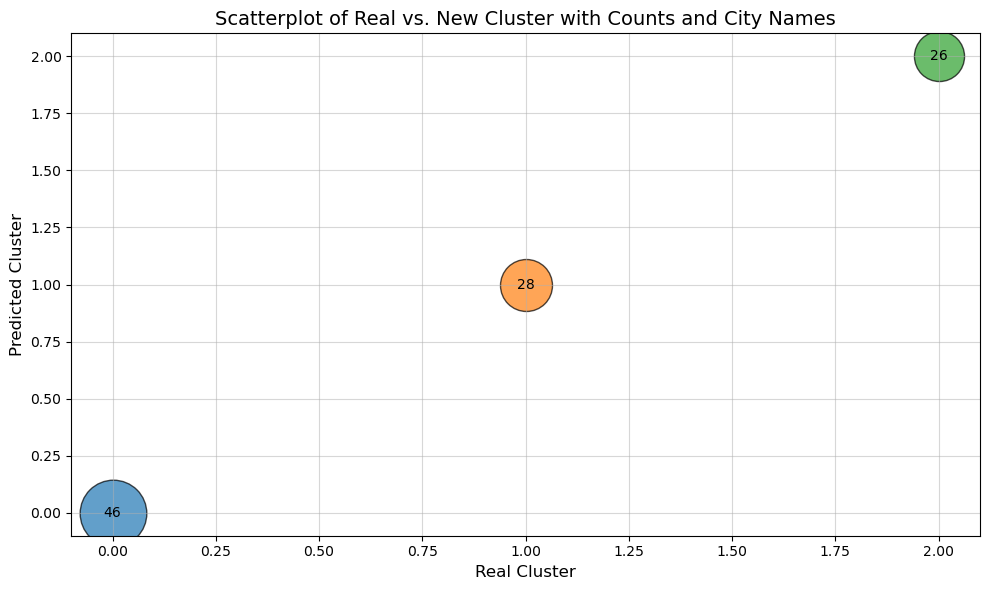

In [22]:
# Combine the real clusters, predictions, and city names into a DataFrame
data = pd.DataFrame({
    'City': cluster_orig['City'],  # Include the City column
    'Real Cluster': cluster_orig["Cluster"],
    'Predicted Cluster': cluster_new['Cluster']
})

# Identify mismatches
mismatches = data[data['Real Cluster'] != data['Predicted Cluster']]

# Count occurrences of each (real cluster, predicted cluster) pair
counts = data.groupby(['Real Cluster', 'Predicted Cluster']).size().reset_index(name='Count')

# Create the scatterplot
plt.figure(figsize=(10, 6))

# Scatter points for each unique pair
for _, row in counts.iterrows():
    plt.scatter(
        row['Real Cluster'],
        row['Predicted Cluster'],
        s=row['Count'] * 50,  # Scale marker size by count
        alpha=0.7,
        edgecolor='black',
        label=None if row['Count'] == 1 else f"{int(row['Count'])} instances"
    )
    # Annotate the counts at each coordinate
    plt.text(
        row['Real Cluster'], 
        row['Predicted Cluster'], 
        str(row['Count']), 
        fontsize=10, 
        color='black',
        ha='center',
        va='center'
    )

# Annotate mismatched cities
for _, row in mismatches.iterrows():
    plt.text(
        row['Real Cluster'], 
        row['Predicted Cluster'], 
        row['City'],  # Add the city name
        fontsize=9, 
        color='red',
        ha='right',
        va='bottom'
    )
    print(row['City'])

# Add title, labels, and grid
plt.title('Scatterplot of Real vs. New Cluster with Counts and City Names', fontsize=14)
plt.xlabel('Real Cluster', fontsize=12)
plt.ylabel('Predicted Cluster', fontsize=12)
plt.grid(True, alpha=0.5)

# Ensure layout is neat
plt.tight_layout()
plt.show()
